<a href="https://colab.research.google.com/github/SudhakarAnemu/AI-DS-ML-DL/blob/master/DL_TensroFlow_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
print("js")

js


# Importing all required Libraries

In [0]:
%tensorflow_version 2.x

In [40]:
!pip install tensorflow
!pip install scikit-learn
!pip install tensorflow-datasets

In [0]:
import tensorflow as tf

In [42]:
print("Version of the Tenserflow : ", tf.__version__)

Version of the Tenserflow :  2.1.0-rc1


##Section 4

### Example 1

Import all relevant libraries

In [43]:
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # nice graphs
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs
print("Import done")

Import done


Generate random input data to train on.
<br>we are about to create a two variable linear model :<br>f(x,z) = a*x +b*z +c
<br>From the linear model: inputs = n * k = 1000*2
<br>

In [44]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs, zs)) # define like a matrix
print("shape of the inputs(its like Matrix) : ", inputs.shape)

shape of the inputs(its like Matrix) :  (1000, 2)


Create the targets we will aim at
<br> targets = f(x,z) = 2*x - 3*z + 5 + noise
<br> here 2,3 are weights and 5 is the bias
<br> noise will always be there in the real data. 


In [45]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print("shape of the targets : ", targets.shape)
# print("Sample data : ", targets

shape of the targets :  (1000, 1)


In [46]:
print(targets.any)

<built-in method any of numpy.ndarray object at 0x7eff41ece1c0>


Plot the training data
<br>The point is to see that there is a strong trend that out model should learn to reproduce
<br>

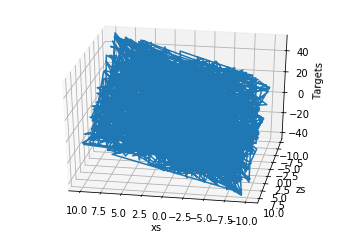

In [47]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Initialize variables
<br>Our initial weights and biases will be picked randomly from the interval [-0.1,0.1]
<br>weights : matrix, biases : scaler
<br>

In [48]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))
print("Weights : ", weights)
biases = np.random.uniform(-init_range, init_range, size=1)
print("Biases : ", biases)

Weights :  [[0.04127305]
 [0.03460547]]
Biases :  [0.05906763]


Set a learning rate(eta)
<br>

In [0]:
learning_rate = 0.02 #we can play with different learning rates

Train the model
<br>Procedure will be repeated.
<br>Game plan for each iteration
<br>1. calculate outputs
<br>2. compare outputs to targets through the loss
<br>3. print the loss
<br>4. Adjust weights and biases
<br>

In [50]:
for i in range(5000):
  outputs = np.dot(inputs, weights) + biases # y = mx + c - 1000*1 1000*2  2*1  scalar
  deltas = outputs - targets # deltas represents the diff between outputs and input targets
  loss = np.sum(deltas ** 2) / 2 / observations
  print("losss : ", loss)
  deltas_scaled = deltas / observations
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  biases = biases - learning_rate * np.sum(deltas_scaled)

losss :  225.22140921021492
losss :  34.71870462643525
losss :  14.056767126629868
losss :  11.448790386536283
losss :  10.782810076401411
losss :  10.34028603589239
losss :  9.936466878665419
losss :  9.550871294040764
losss :  9.180726651211446
losss :  8.82519987060583
losss :  8.483690154505894
losss :  8.155642264926412
losss :  7.840525266510859
losss :  7.537829420906626
losss :  7.247065112532943
losss :  6.9677620286683855
losss :  6.6994683955657734
losss :  6.441750247348544
losss :  6.1941907240284815
losss :  5.95638939722856
losss :  5.727961622488123
losss :  5.50853791709909
losss :  5.297763362466387
losss :  5.095297030025928
losss :  4.900811429791476
losss :  4.713991980638479
losss :  4.534536501468005
losss :  4.362154722427804
losss :  4.196567815399818
losss :  4.037507942994735
losss :  3.8847178253241093
losss :  3.7379503238492537
losss :  3.596968041633799
losss :  3.461542939353359
losss :  3.331455966441111
losss :  3.206496706772784
losss :  3.08646303831

Print weight and biases and see if we have worked correctionly 
<br> Play around with the code for homework.
<br>1. number of observations
<br>2. leanring rate
<br>3. Number of iterations
<br>4. initial range for initializing weights and biases

In [51]:
print("weight : ", weights, " biases : ", biases)


weight :  [[ 1.99650677]
 [-3.0019012 ]]  biases :  [5.01660267]


Plot last output vs target

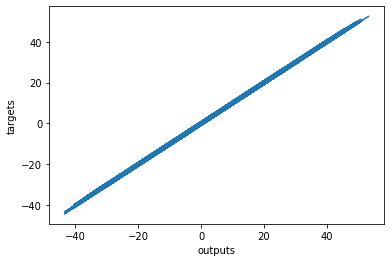

In [52]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

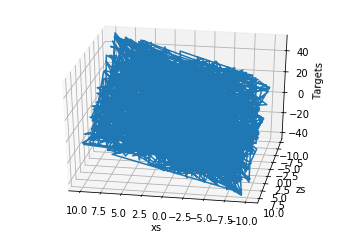

In [53]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Section 5

Same ex with TF
Minimal ex with TF
<br> Import the relevanth libraries

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("Import done")

Import done


Data generation

In [0]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


Solving with TensorFlow

In [0]:
training_data = np.load('TF_intro.npz')

In [57]:
# input_size = 2
# output_size = 1

# model = tf.keras.Sequential([
#                              tf.keras.layers.Dense(output_size)
# ])

# model.compile(optimizer = 'sgd', loss='mean_squared_error')

# model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)

##### the only diff is that verbose=0 / 2

input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 36.9872
Epoch 2/100
1000/1000 - 0s - loss: 4.1499
Epoch 3/100
1000/1000 - 0s - loss: 1.3929
Epoch 4/100
1000/1000 - 0s - loss: 0.6323
Epoch 5/100
1000/1000 - 0s - loss: 0.4332
Epoch 6/100
1000/1000 - 0s - loss: 0.3753
Epoch 7/100
1000/1000 - 0s - loss: 0.3612
Epoch 8/100
1000/1000 - 0s - loss: 0.3574
Epoch 9/100
1000/1000 - 0s - loss: 0.3579
Epoch 10/100
1000/1000 - 0s - loss: 0.3457
Epoch 11/100
1000/1000 - 0s - loss: 0.3512
Epoch 12/100
1000/1000 - 0s - loss: 0.3511
Epoch 13/100
1000/1000 - 0s - loss: 0.3479
Epoch 14/100
1000/1000 - 0s - loss: 0.3528
Epoch 15/100
1000/1000 - 0s - loss: 0.3519
Epoch 16/100
1000/1000 - 0s - loss: 0.3499
Epoch 17/100
1000/1000 - 0s - loss: 0.3567
Epoch 18/100
1000/1000 - 0s - loss: 0.3479
Epoch 19/100
1000/1000 - 0s - loss: 0.3452
Epoch 20/100
1000/1000 - 0s - loss: 0.3478
Epoch 21/100
1000/1000 - 0s - loss: 0.3488
Epoch 22/100
1000/1000 - 0s - loss: 0.3465
Epoch 23/100
1000/1000 - 0s - loss: 0.35

In [58]:
model.layers[0].get_weights()

[array([[ 1.9892914],
        [-3.0157735]], dtype=float32), array([4.989286], dtype=float32)]

In [59]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9892914],
       [-3.0157735]], dtype=float32)

In [60]:
bias = model.layers[0].get_weights()[1]
bias

array([4.989286], dtype=float32)

Extract the outputs (make predictions)

In [61]:
# model.predict_on_batch(training_data['inputs']).round(1)
model.predict_on_batch(training_data['inputs'])


<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[ 26.593603  ],
       [-18.694403  ],
       [-11.646776  ],
       [-13.746452  ],
       [-28.196539  ],
       [ 27.425165  ],
       [-15.204002  ],
       [ -6.912398  ],
       [ 15.743443  ],
       [-16.426739  ],
       [  0.9324622 ],
       [-20.608824  ],
       [ 21.185476  ],
       [ 24.515982  ],
       [  4.529226  ],
       [-12.68895   ],
       [ 26.475061  ],
       [ 18.105965  ],
       [ -6.9861207 ],
       [ 21.246515  ],
       [ 47.080856  ],
       [-29.129015  ],
       [ 25.541971  ],
       [-18.723925  ],
       [  1.6831403 ],
       [ 39.397133  ],
       [  7.7897654 ],
       [ 31.207924  ],
       [  8.751931  ],
       [ 10.694199  ],
       [-11.63648   ],
       [ -0.48697138],
       [  4.461509  ],
       [-39.643963  ],
       [-21.754416  ],
       [ 11.7552185 ],
       [ -2.9297    ],
       [-18.388165  ],
       [-22.516623  ],
       [ 20.939877  ],
       [ -6.5749116 ],
      

In [62]:
training_data['targets'].round(1)

array([[ 26.6],
       [-18.5],
       [-10.7],
       [-14.2],
       [-28.9],
       [ 26.4],
       [-15.9],
       [ -6. ],
       [ 15.1],
       [-15.8],
       [  0.8],
       [-19.8],
       [ 21.2],
       [ 25.3],
       [  3.9],
       [-12.2],
       [ 25.8],
       [ 17.9],
       [ -7.3],
       [ 21.2],
       [ 46.4],
       [-29.2],
       [ 24.8],
       [-18.4],
       [  2. ],
       [ 39.2],
       [  6.9],
       [ 31.4],
       [  9. ],
       [ 11.6],
       [-11.3],
       [ -0.2],
       [  4.1],
       [-39. ],
       [-21.5],
       [ 10.7],
       [ -3.5],
       [-17.8],
       [-22.4],
       [ 20.5],
       [ -5.7],
       [-22.8],
       [ 20.6],
       [ 11. ],
       [-11.9],
       [ 30.4],
       [ 22.1],
       [ -9.1],
       [ 10.2],
       [-11.7],
       [ 24.5],
       [ 16.6],
       [ 22.9],
       [  9.7],
       [-19.6],
       [  1.4],
       [ 16.5],
       [-18.2],
       [ 29. ],
       [ -7.1],
       [-16.3],
       [-16.5],
       [

Plotting the data

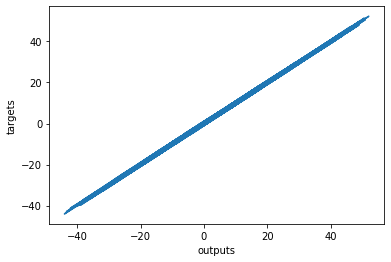

In [63]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Section 12 - The MNIST example

Import the relavent packages

In [64]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
print("Import done")

Import done


Data

In [0]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
# Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.

Training, Test and Validation datasets

In [66]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

# Transforming the values
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label

# scale whole train data and store it in a variable
scaled_train_and_validation_data = mnist_train.map(scale)

# scale whole test data 
test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))
# validation_inputs, validation_targets = next(iter(validation_data))

print("done")


done


Model - Outline the model

In [67]:
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(output_size,activation='softmax')
])

print("done")

done


Choose the optimizer and the loss function

In [68]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("done")

done


Training

In [72]:
# determine the maximum number of epochs
NUM_EPOCHS = 5

# we fit the model, specifying the
# training data
# the total number of epochs
# and the validation data we just created ourselves in the format: (inputs,targets)
model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2, validation_steps=10)

Epoch 1/5
540/540 - 13s - loss: 0.4050 - accuracy: 0.8860 - val_loss: 0.2070 - val_accuracy: 0.9398
Epoch 2/5
540/540 - 13s - loss: 0.1785 - accuracy: 0.9479 - val_loss: 0.1550 - val_accuracy: 0.9547
Epoch 3/5
540/540 - 13s - loss: 0.1352 - accuracy: 0.9597 - val_loss: 0.1245 - val_accuracy: 0.9650
Epoch 4/5
540/540 - 13s - loss: 0.1121 - accuracy: 0.9661 - val_loss: 0.1131 - val_accuracy: 0.9675
Epoch 5/5
540/540 - 13s - loss: 0.0952 - accuracy: 0.9708 - val_loss: 0.1000 - val_accuracy: 0.9688
